In [1]:
from modsim import *
from pandas import read_html

In [6]:
filename = 'World_population_estimates.html'
tables = read_html(filename, header=0, index_col=0, decimal='M')
table2 = tables[2]
table2.columns = ['census', 'prb', 'un', 'maddison','hyde', 'tanton', 'biraben', 'mj', 'thomlinson', 'durand', 'clark']

In [8]:
un = table2.un / 1e9
census = table2.census / 1e9
t_0 = census.index[0]
t_end = census.index[-1]
elapsed_time = t_end - t_0
p_0 = census[t_0]
p_end = census[t_end]
total_growth = p_end - p_0
annual_growth = total_growth / elapsed_time

In [9]:
system = System(t_0=t_0,
                t_end=t_end,
                p_0=p_0,
                annual_growth=annual_growth)

In [10]:
show(system)

,value
t_0,1950.000000
t_end,2016.000000
p_0,2.557629
annual_growth,0.072248


In [15]:
def run_simulation1(system):
    results = TimeSeries()
    results[system.t_0] = system.p_0
    for t in range(system.t_0, system.t_end):
        results[t+1] = results[t] + system.annual_growth
    return results

In [19]:
results1 = run_simulation1(system)

In [21]:
def plot_estimates():
    census.plot(style=':', label='US Census')
    un.plot(style='--', label='UN DESA')
    decorate(xlabel='Year', ylabel='World population (billion)')

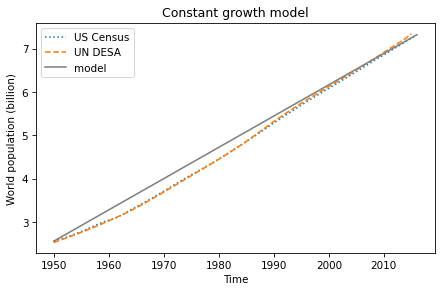

In [22]:
plot_estimates()
results1.plot(label='model', color='gray')
decorate(title='Constant growth model')

In [23]:
def run_simulation2(system):
    results = TimeSeries()
    results[system.t_0] = system.p_0
    for t in range(system.t_0, system.t_end):
        births = system.birth_rate * results[t]
        deaths = system.death_rate * results[t]
        results[t+1] = results[t] + births - deaths
    
    return results

In [26]:
system.death_rate = 7.7 / 1000
system.birth_rate = 25 / 1000

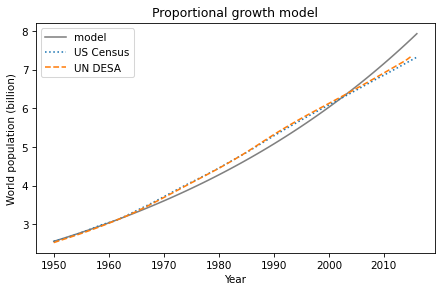

In [27]:
results2 = run_simulation2(system)
results2.plot(label='model', color='gray')
plot_estimates()
decorate(title='Proportional growth model')

In [29]:
def growth_function1(t, population, system):
    births = population * system.birth_rate
    deaths = population * system.death_rate
    return births - deaths

In [30]:
def run_simulation(system, growth_func):
    results = TimeSeries()
    results[system.t_0] = system.p_0
    for t in range(system.t_0, system.t_end):
        growth = growth_func(t, results[t], system)
        results[t+1] = results[t] + growth
    return results

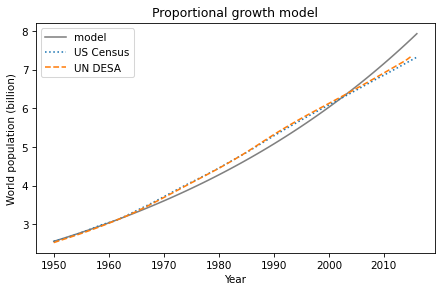

In [31]:
results = run_simulation(system, growth_function1)
results.plot(label='model', color='gray')
plot_estimates()
decorate(title='Proportional growth model')

In [32]:
system.alpha = system.birth_rate - system.death_rate

In [33]:
def growth_function2(t, population, system):
    return population * system.alpha

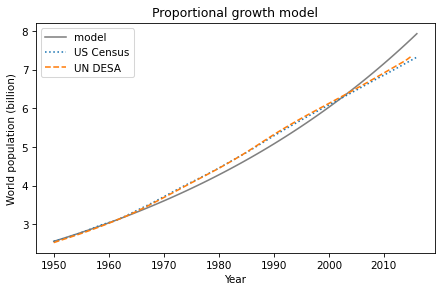

In [34]:
results = run_simulation(system, growth_function1)
results.plot(label='model', color='gray')
plot_estimates()
decorate(title='Proportional growth model')